In [9]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
Y = car_evaluation.data.targets 

In [10]:
df = pd.concat([X, Y], axis = 1)

In [11]:
for feature in X:
    print(f'{feature}: {X[feature].unique()}')

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']


In [12]:
for feature in X:
    print(f'{feature}: {X[feature].value_counts()}')

buying: buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint: maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors: doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons: persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot: lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety: safety
low     576
med     576
high    576
Name: count, dtype: int64


In [13]:
print(Y['class'].value_counts())

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [14]:
import pandas as pd
df['doors'] = df['doors'].replace('5more', 5).astype(int)
df['persons'] = df['persons'].replace('more', 5).astype(int)
df = pd.get_dummies(df, columns = ['buying', 'maint', 'lug_boot', 'safety'])

In [15]:
df['class'] = df['class'].apply(lambda x: 1 if x in ['good', 'vgood'] else 0)

In [17]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df['doors'] = scaler.fit_transform(df[['doors']])
df['persons'] = scaler.fit_transform(df[['persons']])

In [18]:
corr_mtx = df.corr()
corr_mtx['class']

doors             0.042577
persons           0.195459
class             1.000000
buying_high      -0.167397
buying_low        0.257342
buying_med        0.077452
buying_vhigh     -0.167397
maint_high       -0.102437
maint_low         0.192382
maint_med         0.077452
maint_vhigh      -0.167397
lug_boot_big      0.088739
lug_boot_med      0.019890
lug_boot_small   -0.108629
safety_high       0.231028
safety_low       -0.205019
safety_med       -0.026010
Name: class, dtype: float64

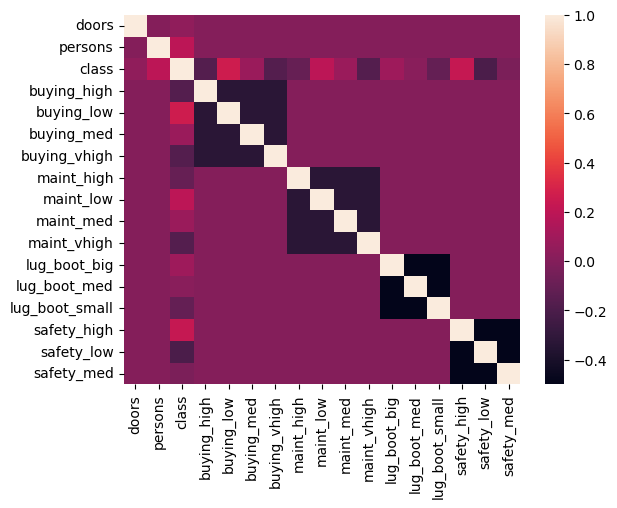

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mtx)
plt.show()

In [25]:
X = df.drop('class', axis = 1)
Y = df['class']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.995, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel = 'linear', random_state = 42)

svm_classifier.fit(X_train, Y_train)

Y_pred = svm_classifier.predict(X_test)

print(accuracy_score(Y_test, Y_pred))

0.5598837209302325
